In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Zad 

* Proszę pobrać dowolny obrazek. 

* Dodajmy do obrazu szum.

* Otwórzmy go w pythonie w skali szarości i przekonwertujmy do numpy array.

* Załóżmy że jego rozdzielczość to $m$ na $n$. Potraktujmy go jako $m$ wektorów $n$ wymiarowych.

* Zredukujmy dane za pomocą SVD z $n$ wymiarów do $k$ wymiarów (proszę rozważyć różne $k$). 

* Zrekonstruujmy teraz obraz z wymiaru $k$ do oryginalnego wymiaru i zobaczmy jak wyglądają.


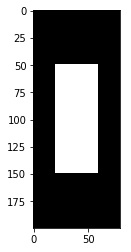

(array([  0,   0,   0, ..., 199, 199, 199], dtype=int64), array([ 1,  2,  4, ..., 76, 77, 79], dtype=int64))


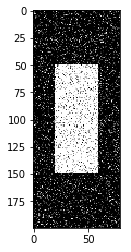

In [13]:
np.set_printoptions()
x = np.zeros((200,80))
x[50:150,20:60] = 1

plt.gray()
plt.imshow(x)
plt.show()

#zaszumiamy:
losowe_indeksy = np.random.choice(2,size=x.shape,p=[0.5,0.5]).nonzero()
print(losowe_indeksy)
x[losowe_indeksy] = x[losowe_indeksy] + np.random.normal(0,0.4,len(losowe_indeksy[0]))
x[x>1] = 1 # zeby pozbyc sie ujemnych
x[x<0] = 0
plt.gray()
plt.imshow(x)
plt.show()

Wykonaj rozkład SVD oraz narysuj wykres zawierający wartości macierzy $S$ (wartości własne).

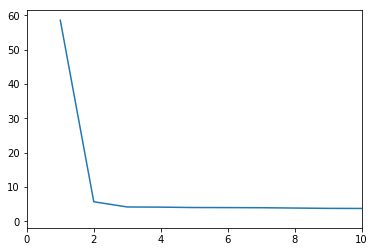

[58.55768196  5.66508002  4.14692466  4.09513731  3.98012186  3.95936456
  3.92308486  3.83265882  3.74001682  3.711865    3.65304515  3.5979313
  3.58092542  3.48533908  3.45526482  3.41562757  3.35415151  3.28791565
  3.26593519  3.2376957   3.21022845  3.15024488  3.1290926   3.08167414
  3.05923465  3.01103746  2.98407842  2.90401583  2.86983894  2.80997765
  2.76615606  2.73548617  2.70011927  2.6661061   2.6356408   2.61299414
  2.58527011  2.50664712  2.48792055  2.45182345  2.39899805  2.35905256
  2.33717483  2.29514831  2.27552741  2.23462929  2.20298346  2.15661929
  2.12822447  2.11418494  2.08770964  2.06233885  2.03781223  2.00803472
  1.97709526  1.92723702  1.89896491  1.83521709  1.80502032  1.75413306
  1.72901163  1.69161989  1.66252726  1.63376544  1.60099028  1.58092345
  1.55896079  1.49427492  1.47639787  1.42533909  1.39288499  1.35238541
  1.34596955  1.29434344  1.25925286  1.18783601  1.17228433  1.12480566
  1.09313546  0.95526014]


In [14]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x)
np.fill_diagonal(S,s)
plt.plot(range(1,len(s)+1),s)
plt.xlim(0,10)
plt.show()
print(s)

Odtwórz obrazek zerując wszystkie po za 3 pierwszymi wartościami

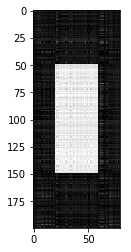

In [15]:
k = 3
x2 = np.dot(np.dot(U,S)[:,0:k],V[0:k,:])
x2[x2>1] = 1
x2[x2<0] = 0
plt.gray()
plt.imshow(x2)
plt.grid(False)
plt.show()

# zapamietaj
ZZ1 = x2

# Zad
Proszę narysowac wyniki dla 

$$
k = 2, ...10
$$

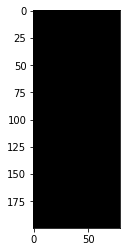

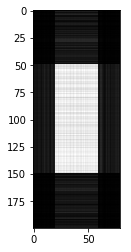

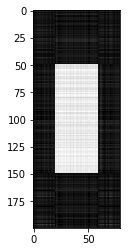

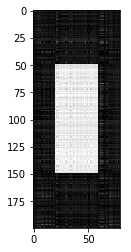

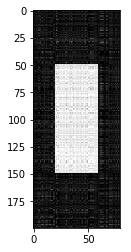

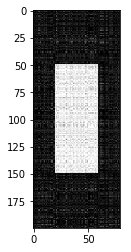

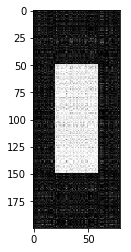

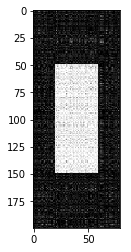

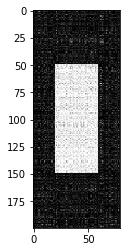

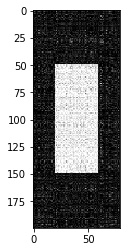

In [16]:
for i in range(10):
    k = i
    x2 = np.dot(np.dot(U,S)[:,0:k],V[0:k,:])
    x2[x2>1] = 1
    x2[x2<0] = 0
    plt.gray()
    plt.imshow(x2)
    plt.show()

# Zad 

* Proszę teraz potraktować obrazek jako zbiór kostek 8 na 8 - czyli dostajemy wektor 64 wymiarowy. 
* Dokonać tej samej procedury kompresji. Które podejście daje mniejszy błąd od oryginału używając tej samej ilości komponentów (dowolna odlegość po pikselach) - dlaczego?

In [17]:
print(x.shape)

(200, 80)


Obcinamy obrazek, tak by wysokość i szetrokość była podzielna przez 8

In [18]:
h_size = int(x.shape[1]/8) * 8
v_size = int(x.shape[0]/8)*8

X = x[:v_size, :h_size]

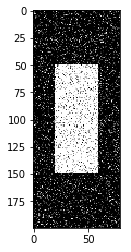

In [19]:
plt.imshow(X, cmap = 'gray')
plt.show()

Przygotowywujemy tablice na nasze kostki

In [20]:
res = np.zeros((int(X.shape[0]*X.shape[1] / 64), 64))

Wypełniamy tablicę

In [21]:
licz = 0
for i in range(0,X.shape[0],8):
    for j in range(0,X.shape[1],8):
        tmp = X[i:i+8, j:j+8].flatten()
        res[licz, :] = tmp
        licz = licz + 1

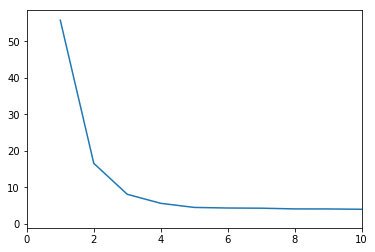

[55.74528964 16.53557259  8.06330191  5.58643637  4.46346875  4.3038818
  4.25382782  4.05698684  4.04436716  3.95839512  3.89562629  3.83130951
  3.76459964  3.70463688  3.66924866  3.58049482  3.52360185  3.49332392
  3.46225498  3.37268183  3.35021827  3.32086423  3.30028862  3.16599832
  3.15122109  3.12145598  3.04511771  3.03254823  3.02127715  2.93332259
  2.91580718  2.8703157   2.84590715  2.78252744  2.77638212  2.73925096
  2.68717297  2.65404223  2.60264084  2.5684921   2.54683186  2.47901243
  2.40570018  2.36150658  2.30948504  2.293765    2.26617848  2.17898971
  2.16231061  2.13995188  2.09078019  2.06901182  2.03315551  2.00936184
  1.98524445  1.93571678  1.87952857  1.82906923  1.79763399  1.74483808
  1.71853842  1.69779768  1.6145255   1.58903683]


In [22]:
U, s, V = np.linalg.svd(res)
S = np.zeros_like(res)
np.fill_diagonal(S,s)
plt.plot(range(1,len(s)+1),s)
plt.xlim(0,10)
plt.show()
print(s)

In [23]:
k = 3
x2 = np.dot(np.dot(U,S)[:,0:k],V[0:k,:])
x2[x2>1] = 1
x2[x2<0] = 0

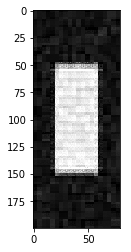

In [25]:
Z = np.zeros((v_size, h_size))

licz = 0
for i in range(0,Z.shape[0],8):
    for j in range(0,Z.shape[1],8):
        Z[i:i+8, j:j+8] = np.reshape(x2[licz], (8,8))
        licz = licz + 1

plt.gray()
plt.imshow(Z)
plt.show()

#zapamiętaj
ZZ2 = Z

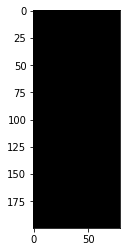

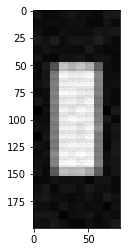

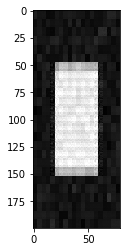

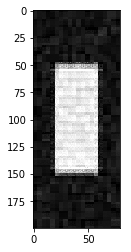

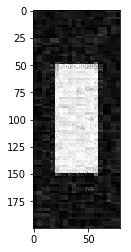

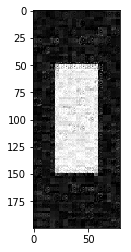

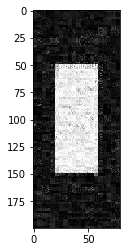

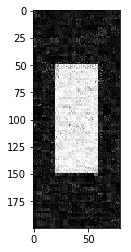

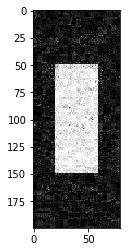

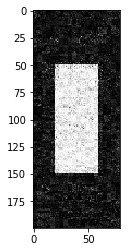

In [26]:
for i in range(10):
    k = i
    x2 = np.dot(np.dot(U,S)[:,0:k],V[0:k,:])
    x2[x2>1] = 1
    x2[x2<0] = 0
    Z = np.zeros((v_size, h_size))

    licz = 0
    for i in range(0,Z.shape[0],8):
        for j in range(0,Z.shape[1],8):
            Z[i:i+8, j:j+8] = np.reshape(x2[licz], (8,8))
            licz = licz + 1
            
    plt.gray()
    plt.imshow(Z)
    plt.show()        
    
    
    

# Zad

Dla k =3 policz różnicę między oryginałem a powyższymi dwoma przypadkami.

In [ ]:
print(np.mean(x[:v_size, :h_size] - ZZ1[:v_size, :h_size])**2)

print(np.mean(x[:v_size, :h_size] - ZZ2[:v_size, :h_size])**2)
# dist = LA.norm(x[:v_size, :h_size] - ZZ1[:v_size, :h_size], axis=1)
# print(dist)